# Feature Selection with Categorical Data

## The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic.

https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [11]:
# DermaDetect Copyright (C), 2021

from sklearn import tree
import pandas as pd
import pickle
import argparse
import os
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
import sklearn
print(sklearn.__version__)

0.24.2


In [4]:
data_relative_path = 'D:\Python\Data Science\8200bio_derma_detect\public_8200bio_challenge-main\data\dd_data.csv'
data = pd.read_csv(data_relative_path)
data.head()

,age,pus,itch,size,shape,crater,gender,vesicle,bleeding,quantity,...,is_secondary_locations_toes,is_secondary_locations_toes_external,is_secondary_locations_toes_internal,is_secondary_locations_tongue,is_secondary_locations_upper_arm_external,is_secondary_locations_upper_arm_internal,is_secondary_locations_vaginal_region,is_secondary_locations_wrist_external,is_secondary_locations_wrist_internal,diagnosis
0,34.0,False,False,pea,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,True,eczema uns
1,41.0,False,False,unknown,unknown,False,female,False,False,unknown,...,False,False,False,False,False,False,False,False,False,contact dermatitis
2,25.0,False,False,pea,non-round,False,male,False,False,multiple,...,False,False,False,False,False,False,False,False,False,verruca vulgaris
3,49.0,False,True,>palm,round,False,female,False,False,multiple,...,False,False,False,False,False,False,False,False,False,tinea versicolor
4,21.0,False,False,pea,round,False,female,False,False,clustered,...,False,False,False,False,False,False,False,False,False,seborrheic dermatitis


In [9]:
# split into input (X) and output (y) variables
X = data.iloc[:, :-1]
y = data.iloc[: ,-1]
y.head()

0               eczema uns
1       contact dermatitis
2         verruca vulgaris
3         tinea versicolor
4    seborrheic dermatitis
Name: diagnosis, dtype: object

# look at the data

<AxesSubplot:xlabel='diagnosis', ylabel='age'>

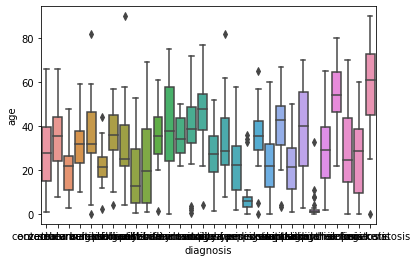

In [23]:
sns.boxplot(x='diagnosis', y='age', data=data)


<AxesSubplot:xlabel='vesicle', ylabel='count'>

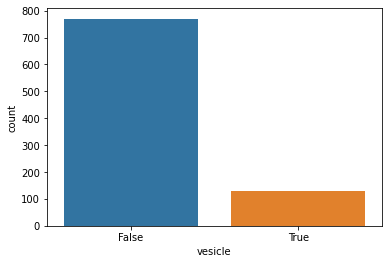

In [29]:
sns.countplot(x='vesicle', data=data)

Show value counts for two categorical variables:

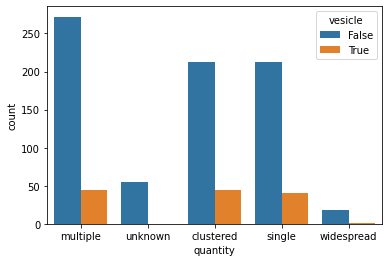

In [33]:
ax = sns.countplot(x="quantity", hue="vesicle", data=data)

# preprocessing encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder   # יש חשיבות וסדר לנתונים (לדוגמה שנות לימוד)
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()     # instanciate OrdinalEncoder to Encode categorical features as an integer array.
    le = Labelencoder()					# TODO - how to do all the columns together
    oh = OneHotEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [35]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

NameError: name 'numeric_transformer' is not defined

# split the data for training and testing

In [24]:
from sklearn.model_selection import train_test_split

# split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (603, 107) (603,)
Test (297, 107) (297,)


### We can use the OrdinalEncoder() from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known.
The best practice when encoding variables is to fit the encoding on the training dataset, then apply it to the train and test datasets.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# EXAMPLE FOR ENCODE:
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
print(enc.categories_)
enc.transform([['Female', 3], ['Male', 1]])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder   # יש חשיבות וסדר לנתונים (לדוגמה שנות לימוד)
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()     # instanciate OrdinalEncoder to Encode categorical features as an integer array.
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

## prepare the target variable - map the two class labels to 0 and 1 using LabelEncoder
This is a type of ordinal encoding, and scikit-learn provides the LabelEncoder class specifically designed for this purpose. We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable

In [ ]:
import numpy as np
np.unique(X_train[: ,2], return_counts=True)

In [ ]:
ordi = ["'0-4'", "'5-9'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
        "'35-39'", "'40-44'", "'45-49'", "'50-54'"]                                    # assigning in the correct order

In [ ]:
# check where we need to order the list before LabelEncoder
for a in range (0, 9):
    print(a, ":", np.unique(X_train[: ,a]))
    

In [ ]:
from sklearn.preprocessing import LabelEncoder
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:

ordi = OrdinalEncoder(categories=[2])
ordi.fit(X-train[[]])

In [ ]:
np.unique(X_train[: ,3])

In [ ]:
np.unique(24-26, return_index=True)

In [ ]:
# call these functions to prepare our data:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)